##Post2Caption

Adam Khakhar

akhakhar@wharton.upenn.edu



##Motivation

Image captioning has been researched intensely in the past 10 years. Recurrent neural models for image captioning usually employ an encoder-decodr gramework with an attention mechanism. In most of the image captioning research, the dataset includes captions directly tied to images: the captions serve as a description or story of the image. However, in social media posts, it is common for captions to be styled as a joke or a statement, rather than a vanilla description of the image. In this paper, I intend to research applications of a recurrent neural model for image captioning where the caption is not necessarily a description of the image or the objects in the image.



##Architecture and Hyperparameter Selection Summary

The goal of this model is to generate an Instagram styled caption for a given post (image). To accomplish this, I will use an encoder decoder combination of a Convolutional Neural Network and Recurrent Neural Network with attention. I will use a pretrained CNN (InceptionV3) to generate a vector for the image. I will feed this vector into the RNN with attention and Gated Recurrent Unit to generate a caption.

##Acknowledgements and References

This project was supported by the University of Pennsylvania School of Engineering and Applied Sciences, Computer Science Department: CIS 545: Big Data Analytics taught by Professor Zachary Ives, PhD. The works presented were compiled by Adam Khakhar. Some parts of the notebook include attributions to various papers from which Adam Khakhar has adapted, with some parts copied directly.
 

*   Justin Johnson, Andrej Karpathy, Li Fei-Fei; The IEEE Conference on Computer Vision and Pattern Recognition (CVPR), 2016, pp. 4565-4574
*   Steven J. Rennie, Etienne Marcheret, Youssef Mroueh, Jerret Ross, Vaibhava Goel; The IEEE Conference on Computer Vision and Pattern Recognition (CVPR), 2017, pp. 7008-7024
*   Andrej Karpathy, Li Fei-Fei; The IEEE Conference on Computer Vision and Pattern Recognition (CVPR), 2015, pp. 3128-3137
*   Karpathy, A. and Li, F., n.d. Automated Image Captioning With Convnets And Recurrent Nets. https://cs.stanford.edu/people/karpathy/sfmltalk.pdf
*   Karpathy, A, Neuraltalk2, https://github.com/karpathy/neuraltalk2
*   Daoust, Mark (Developer Programs Engineer @ Tensorflow Google) Image Captioning Notebook: https://github.com/tensorflow/docs/blob/master/site/en/tutorials/text/image_captioning.ipynb 
*   Kelvin Xu, Jimmy Ba, Ryan Kiros, Kyunghyun Cho, Aaron Courville, Ruslan Salakhutdinov, Richard Zemel, Yoshua Bengio; Show, Attend and Tell: Neural Image Caption Generation with Visual Attention (ICML 2015), 2015




##Exploration of Data

This paper uses data scraped from Instagram including the post image and the caption of the post. The data was scraped by Prithvi Jaunjale and is freely available here: https://www.kaggle.com/prithvijaunjale/instagram-images-with-captions.
I have cleaned the data, merged folders, and have provided the clean data: https://drive.google.com/drive/folders/1LauH7VWlyCcURjqyd-EaDISG2I1iAlkX?usp=sharing. **To follow along with this notebook, simply download the zip file of the data set from Kaggle (linked above). Unzip the file and upload the img and img2 directories into the root directory of this notebook. Upload the captions_csv.csv and captions_csv2.csv files into the root directory of this notebook.**
In the following module, I will clean and explore the data.

In [0]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import re
import numpy as np
import os
import time
import json
from glob import glob
from PIL import Image
import pickle

The raw data includes 2 files of captions and folders. I will remove captions with empty values and combine the 2 files into 1 file.

In [3]:
captions1 = pd.read_csv('captions_csv.csv')
captions1.head()

,Sr No,Image File,Caption
0,1,img/insta1,NaN
1,2,img/insta2,bye
2,3,img/insta3,"Ok, a few more... sorry I just had so much fun..."
3,4,img/insta4,This was one of my favorite shoots I’ve ever d...
4,5,img/insta5,Wrapped round my finger like a ring


In [4]:
captions2 = pd.read_csv('captions_csv2.csv')
captions2.head()

,20516,img2/insta20516,wHaT dAy Is It Even #stayhomeclub
0,20517,img2/insta20517,Vitamin C for your fashion diet #KatyPursey #S...
1,20518,img2/insta20518,do you know the hotter the fire the purer the ...
2,20519,img2/insta20519,@ryanseacrest 👍🏻
3,20520,img2/insta20520,working hard or hardly working idk 🤷🏼‍♀️
4,20521,img2/insta20521,Step into your destiny with The Bondie 🔮✨ #Sho...


In [5]:
captions1.dropna(inplace=True)
captions1.head()

,Sr No,Image File,Caption
1,2,img/insta2,bye
2,3,img/insta3,"Ok, a few more... sorry I just had so much fun..."
3,4,img/insta4,This was one of my favorite shoots I’ve ever d...
4,5,img/insta5,Wrapped round my finger like a ring
5,6,img/insta6,Yesterday was so much fun!! has been such a hu...


In [18]:
captions2.dropna(inplace=True)
captions2.rename(columns={'20516': 'Sr No', 'img2/insta20516': 'Image File', 'wHaT dAy Is It Even #stayhomeclub': 'Caption'}, inplace=True)
captions2.head()

,Sr No,Image File,Caption
0,20517,img2/insta20517,Vitamin C for your fashion diet #KatyPursey #S...
1,20518,img2/insta20518,do you know the hotter the fire the purer the ...
2,20519,img2/insta20519,@ryanseacrest 👍🏻
3,20520,img2/insta20520,working hard or hardly working idk 🤷🏼‍♀️
4,20521,img2/insta20521,Step into your destiny with The Bondie 🔮✨ #Sho...


In [19]:
print("Shape of captions1: " + str(captions1.shape) + "\nShape of captions2: " + str(captions2.shape))

Shape of captions1: (17100, 3)
Shape of captions2: (14411, 3)


In [20]:
all_captions = pd.concat([captions1, captions2], axis=0)
all_captions.shape

(31511, 3)

In [21]:
all_captions.head()

,Sr No,Image File,Caption
1,2,img/insta2,bye
2,3,img/insta3,"Ok, a few more... sorry I just had so much fun..."
3,4,img/insta4,This was one of my favorite shoots I’ve ever d...
4,5,img/insta5,Wrapped round my finger like a ring
5,6,img/insta6,Yesterday was so much fun!! has been such a hu...


In [22]:
from google.colab import  drive
drive.mount('/drive')

all_captions.to_csv('/drive/My Drive/Post2Caption/all_captions.csv')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


Now I will explore the captions:

*   Repeated captions
*   Most common captions
*   Word cloud

In [23]:
print("Number of captions: " + str(all_captions['Caption'].count()))
print("Number of unique captions: :" + str(all_captions['Caption'].nunique()))

Number of captions: 31511
Number of unique captions: :29736


In [35]:
print(all_captions[all_captions.duplicated(keep='first', subset=['Caption'])].sort_values(by=['Caption']).shape[0])
duplicated_captions = all_captions[all_captions.duplicated(subset=['Caption'])].sort_values(by=['Caption'])['Caption'].drop_duplicates(inplace=False)
num_duplicated_captions = duplicated_captions.shape[0]
print(num_duplicated_captions)

1775
694


In [36]:
duplicated_captions

10978                                        #ANTi #antiR8
10794                                       #ANTiversary 🎈
7541                             #BTS  #MET2018 📸@_janekim
3855     #BackstageWithJLo #JLoFirstLove http://smartur...
11815                                     #Br #Ba #fanclub
                               ...                        
8393                                                    🥶 
17761                                                   🦂 
17365                                                   🦋 
7386                            🧡\nJ’adore \n@dior \n#dior
7352                                 🧡 #chhapaakpromotions
Name: Caption, Length: 694, dtype: object

In [56]:
duplicated_captions_and_count = all_captions.groupby('Caption').count().sort_values(by=['Image File'], ascending=False)[all_captions.groupby('Caption').count().sort_values(by=['Image File'], ascending=False)['Image File'] > 1]
duplicated_captions_and_count.rename(columns={'Sr No': 'Count'}, inplace=True)
duplicated_captions_and_count.drop('Image File', 1, inplace=True)
duplicated_captions_and_count

,Count
Caption,
❤,51
😍,40
♛,37
❤️,29
💋,28
...,...
Sweet dreams,2
My green machine,2
ny,2


Wordcloud of repeated captions

In [0]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

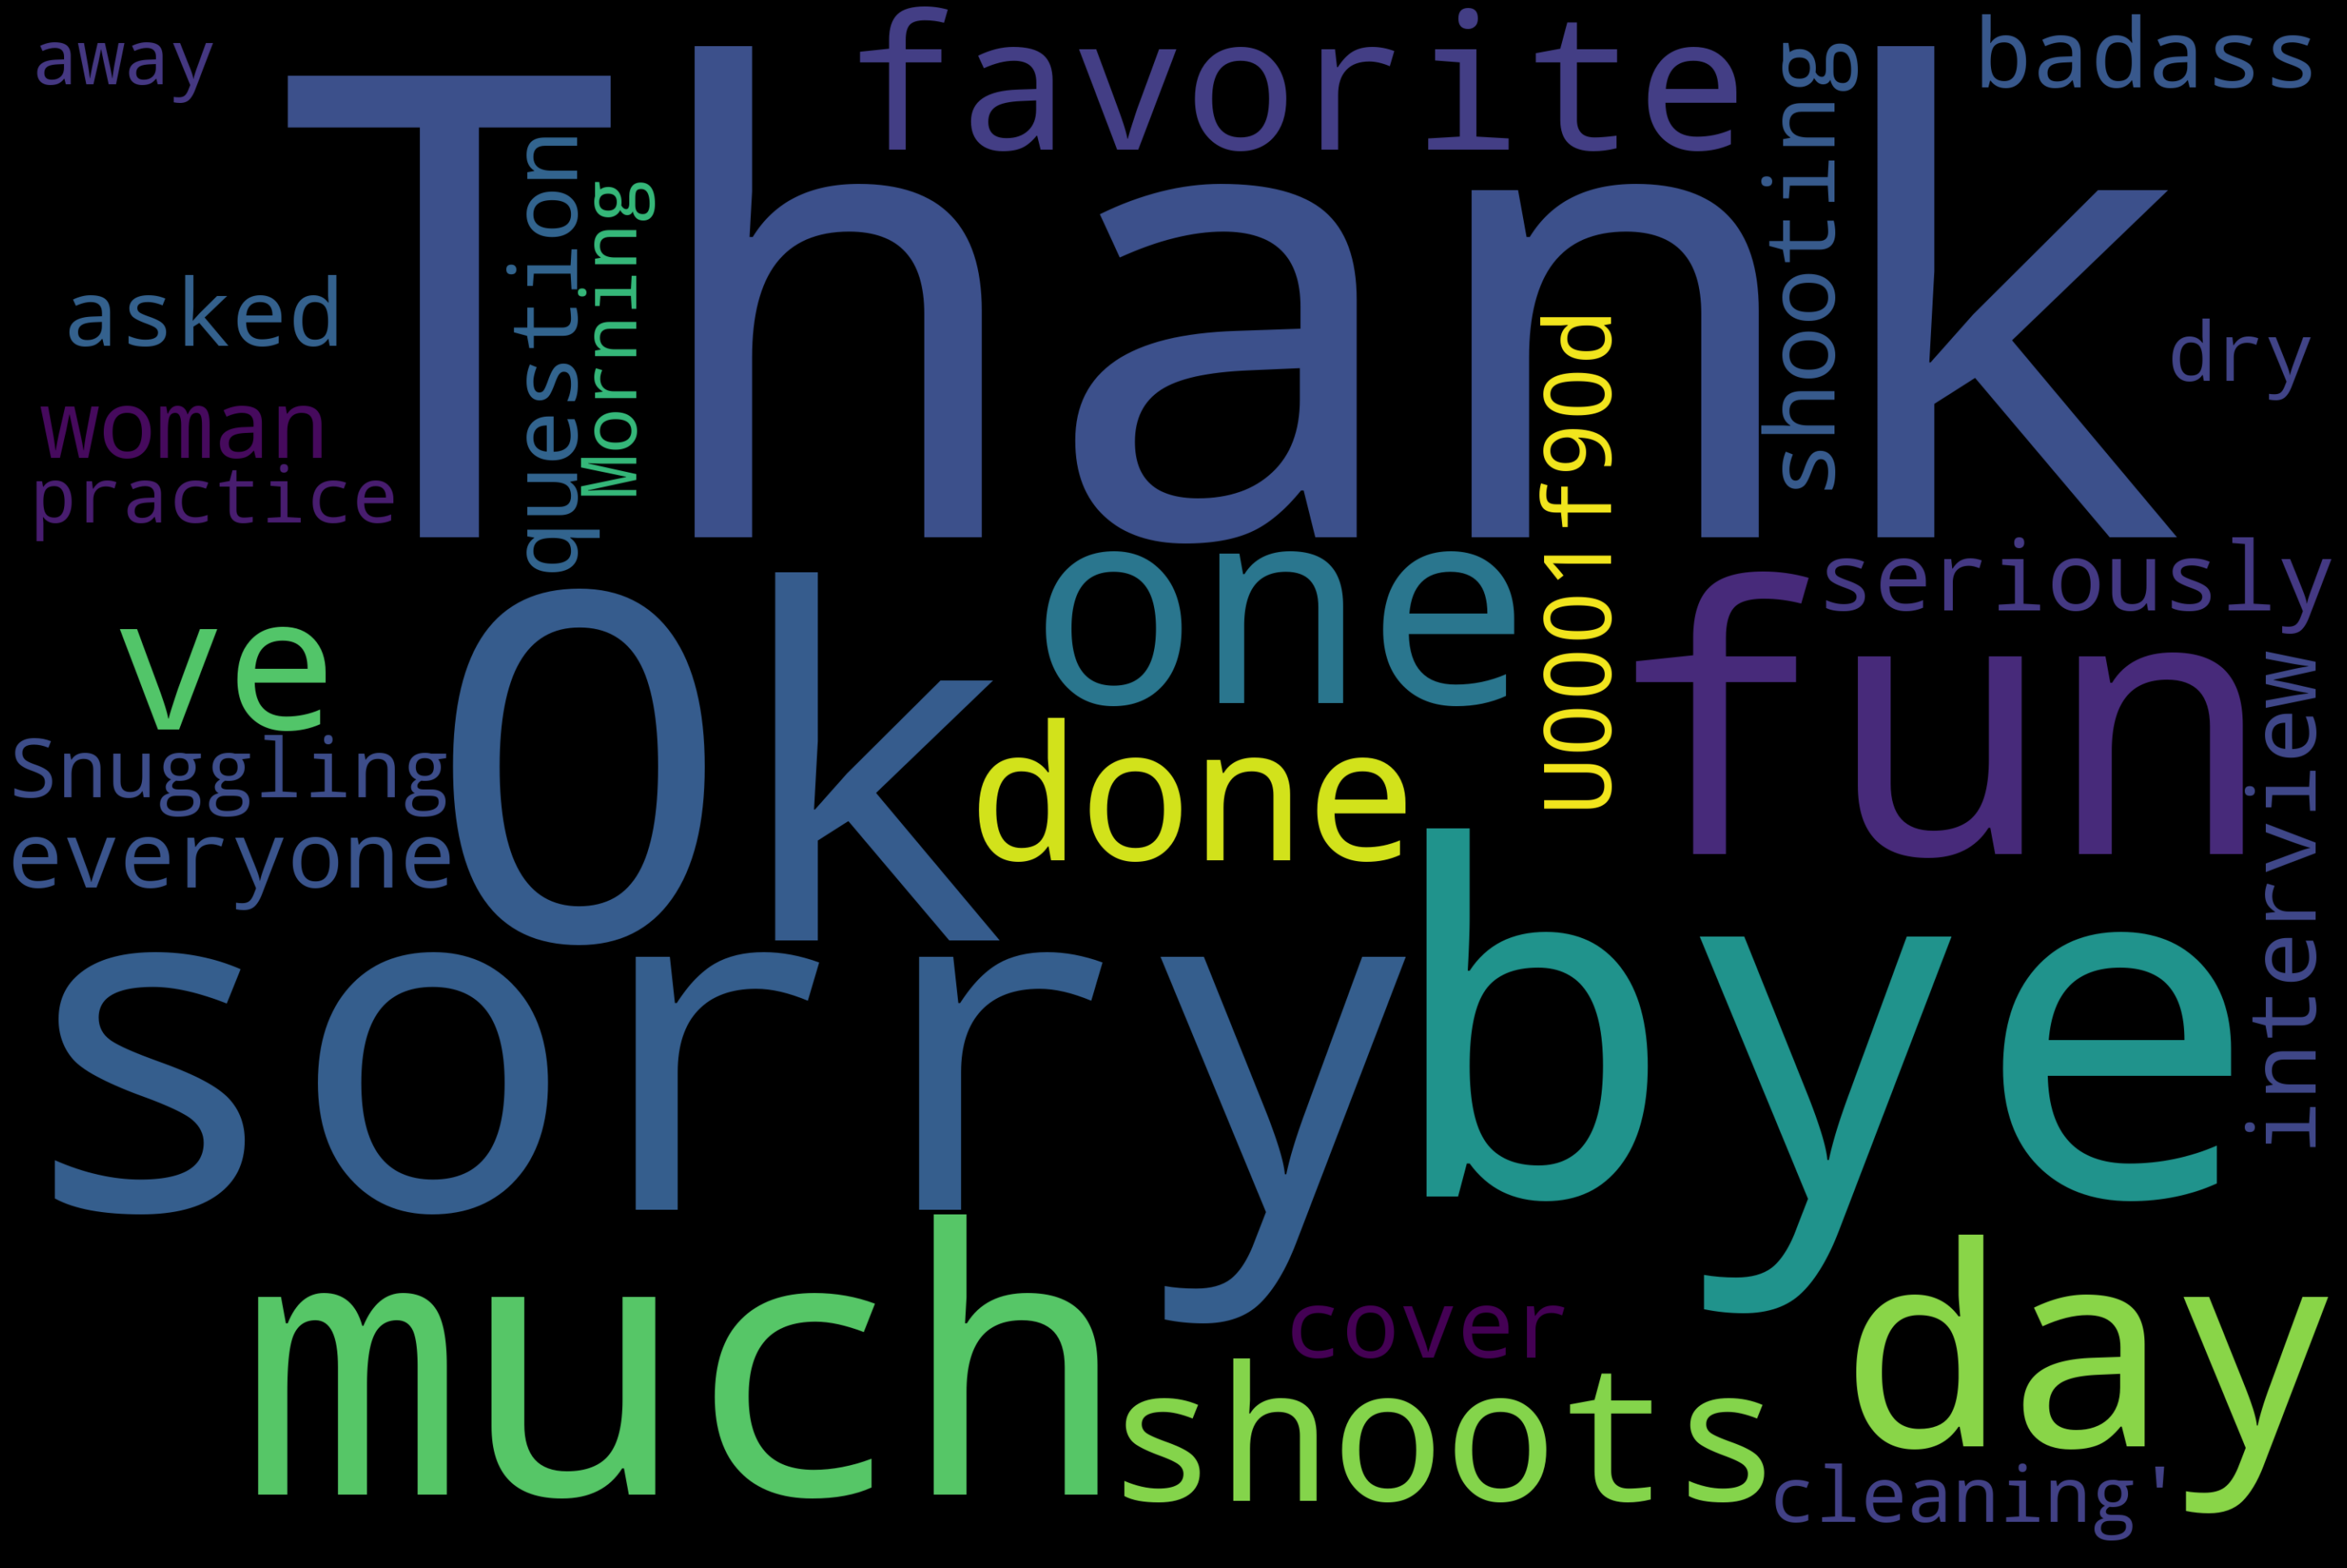

In [62]:
text = all_captions.Caption.values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Note that U0001F90D is the white heart emoji

##Creating CNN Encoder Using InveptionV3

![Model Complexity and Size: Source is from Stanford's CS231N](https://miro.medium.com/max/5250/1*n16lj3lSkz2miMc_5cvkrA.jpeg)